#Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

##type of
###minmaaxscaling
###mean normalization
###max absonte
###robust scaling

#MinMaxScaling - intuition

In [2]:
# weight
# 130
# 67
# 81
# 161
# 32
# 54
# .
# .

In [5]:
#Normalize
#MinMaxScaling
#Xi = Xi - Xmin / Xmax - Xmin
#range[0, 1] always

In [ ]:
#min = 32
#max = 130

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Clasis label', 'Alcohol', 'Malic acid' ]

In [8]:
df

,Clasis label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

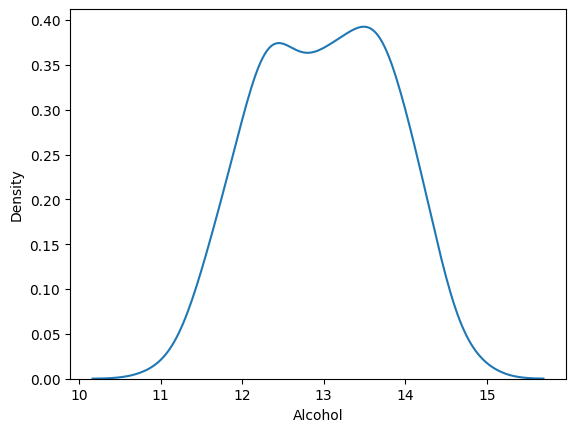

In [9]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

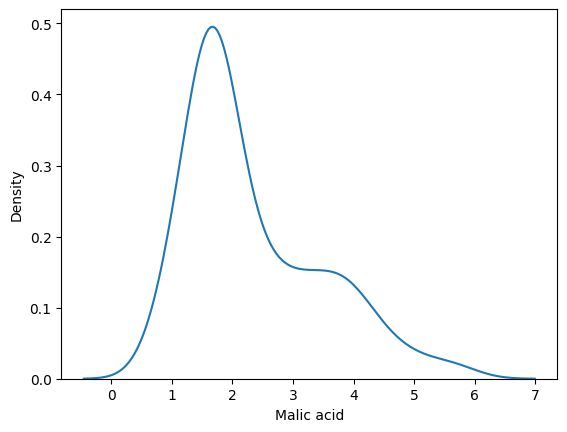

In [10]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

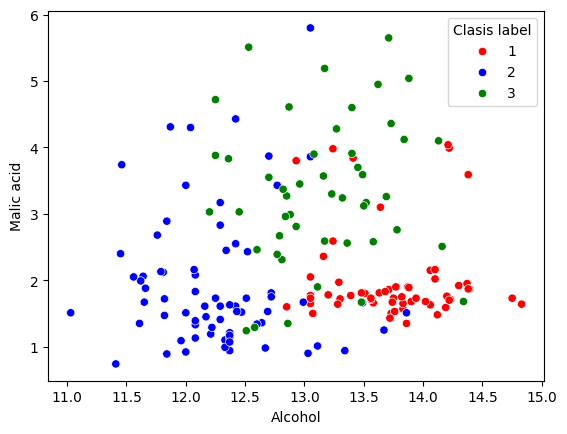

In [13]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Clasis label'],palette=color_dict)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Clasis label', axis=1),df['Clasis label'],test_size=0.2,random_state=0)

X_train.shape, X_test.shape

((142, 2), (36, 2))

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [19]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


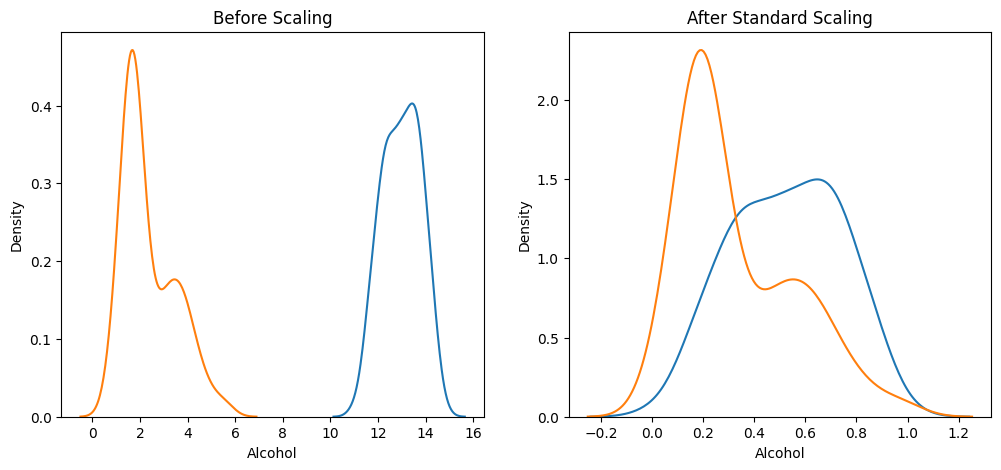

In [20]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()


## Mean Normalization Formula

Mean Normalization scales features by subtracting the mean and dividing by the range (maximum minus minimum) or the standard deviation. This method centers the data around zero.

The formula using the range is:

$X' = \frac{X - \text{mean}}{\text{max} - \text{min}}$

The formula using the standard deviation is:

$X' = \frac{X - \text{mean}}{\text{standard deviation}}$

Where:
- $X'$ is the scaled value.
- $X$ is the original value.
- $\text{mean}$ is the mean of the feature.
- $\text{max}$ is the maximum value of the feature.
- $\text{min}$ is the minimum value of the feature.
- $\text{standard deviation}$ is the standard deviation of the feature.

## Max Absolute Scaling Formula

Max Absolute Scaling scales features by dividing each value by the maximum absolute value of the feature. This scaler does not shift or center the data, and it is particularly useful for data that is already centered at zero or is sparse.

The formula is:

$X' = \frac{X}{|X_{\text{max}}|}$

Where:
- $X'$ is the scaled value.
- $X$ is the original value.
- $|X_{\text{max}}|$ is the maximum absolute value of the feature.

This scaling method is often used with sparse data because it does not disturb the sparsity of the data.

## Robust Scaling Formula

Robust Scaling scales features using statistics that are robust to outliers. It removes the median and scales the data according to the quantile range (the IQR is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile)).

The formula is:

$X' = \frac{X - \text{median}}{\text{IQR}}$

Where:
- $X'$ is the scaled value.
- $X$ is the original value.
- $\text{median}$ is the median of the feature.
- $\text{IQR}$ is the Interquartile Range (75th percentile - 25th percentile) of the feature.